# CS677 Machine Learning Assignment #3

Aayushi Verma

## Question One
Try changing combination and values of hyperparameters for the example mentioned in the provided reference link and explain the impact that it has.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

###  Original Code

In [1]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Maria Telenczuk <https://github.com/maikia>
#         Katrina Ni <https://github.com/nilichen>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [4]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3015.9520


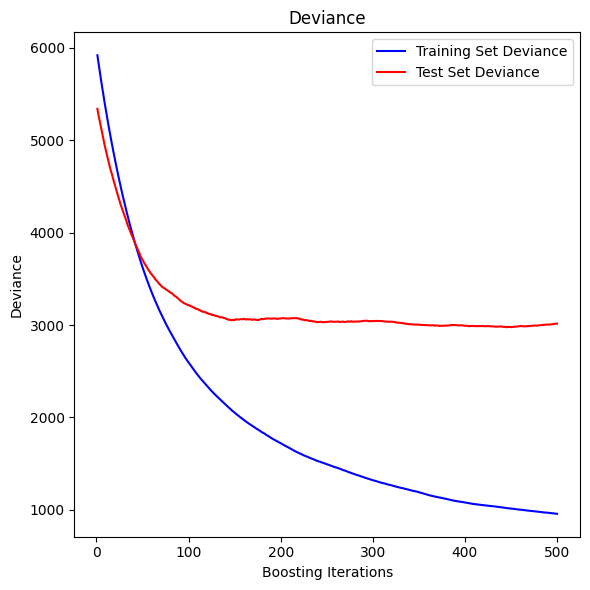

In [5]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

### My Changes to the Original Code

In [6]:
def results_of_changed_params(X_train, X_test, y_train, y_test, params):
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)

    mse = mean_squared_error(y_test, reg.predict(X_test))
    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(reg.staged_predict(X_test)):
        test_score[i] = mean_squared_error(y_test, y_pred)

    fig = plt.figure(figsize=(6, 6))
    plt.subplot(1, 1, 1)
    plt.title("Deviance")
    plt.plot(
        np.arange(params["n_estimators"]) + 1,
        reg.train_score_,
        "b-",
        label="Training Set Deviance",
    )
    plt.plot(
        np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
    )
    plt.legend(loc="upper right")
    plt.xlabel("Boosting Iterations")
    plt.ylabel("Deviance")
    fig.tight_layout()
    plt.show()

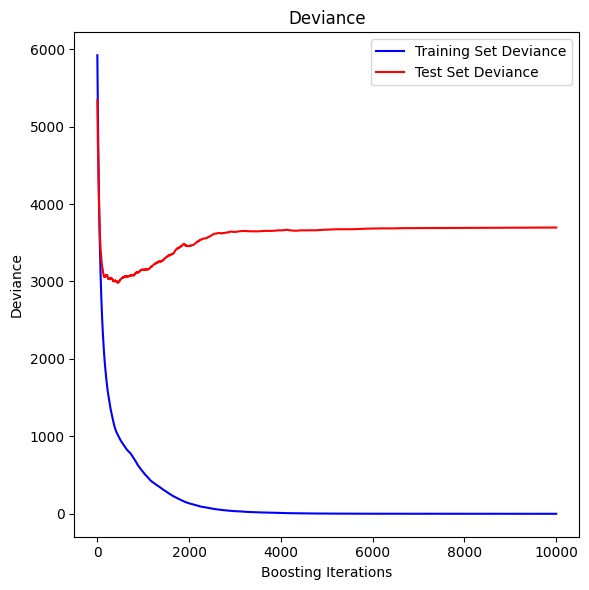

In [7]:
params = {
    "n_estimators": 10000, # changing from 500
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

results_of_changed_params(X_train, X_test, y_train, y_test, params)

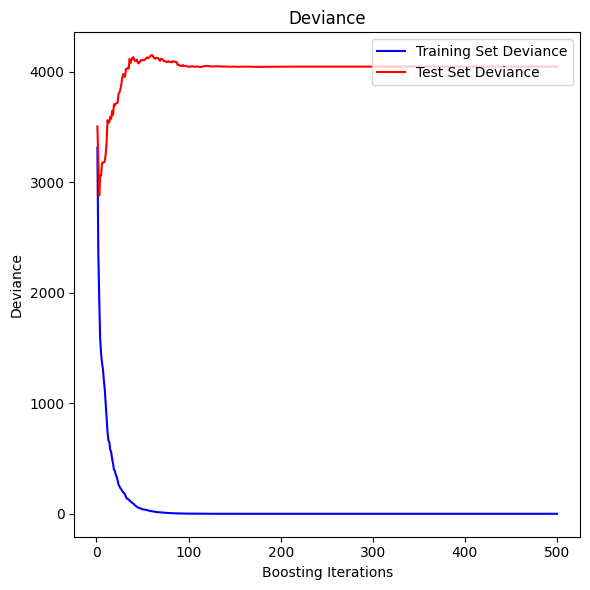

In [8]:
params = {
    "n_estimators": 500, 
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.5, # changing from 0.01
    "loss": "squared_error",
}

results_of_changed_params(X_train, X_test, y_train, y_test, params)

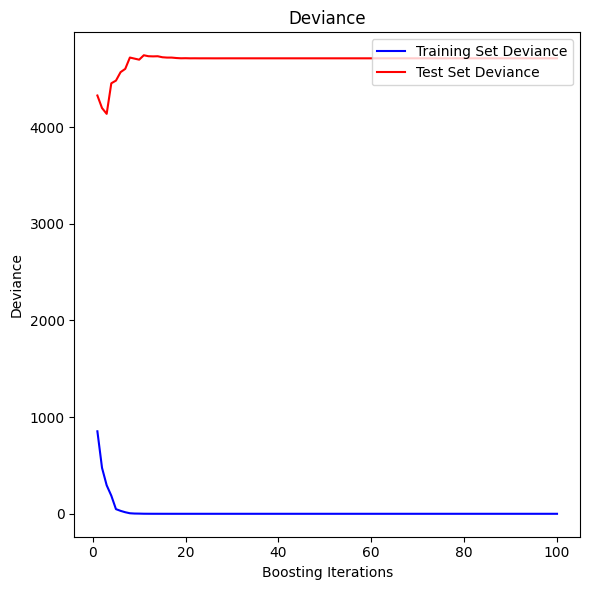

In [9]:
params = {
    "n_estimators": 100, # changing from 500
    "max_depth": 10, # changing from 4
    "min_samples_split": 10, # changing from 5
    "learning_rate": 1, # changing from 0.01
    "loss": "squared_error", 
}

results_of_changed_params(X_train, X_test, y_train, y_test, params)

### My Findings

I modifed the parameters in the originial code three times, like so:
1. changed n_estimators from 500 to 10,000
2. changed learning_rate from 0.01 to 0.5
3. changed n_estimators from 500 to 100, max_depth from 4 to 10, min_samples_split from 5 to 10, and learning_rate from 0.01 to 1

For change #1, I found that there was a larger separation in deviation between the training set and the test set, when compared to the original graph. They both converge at around 1200 boosting iterations. The training set deviance is lower than the testing set deviance.

For change #2, I found that there was an even larger separation in deviation between the training set and the test set, when compared to the original graph, however this time the test deviation spikes twice sharply before converging. This time, both training and testing deviations converge at around 80 boosting iterations, which is much faster than before.

For change #3, the separation in deviation between the training set and the test set is roughly the same as before, however this time they both converge very quickly.

## Question Two
Try different values of k for the example mentioned in the provided reference link and explain the impact that it has.

https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py

###  Original Code

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

(0.0001, 0.31622776601683794)

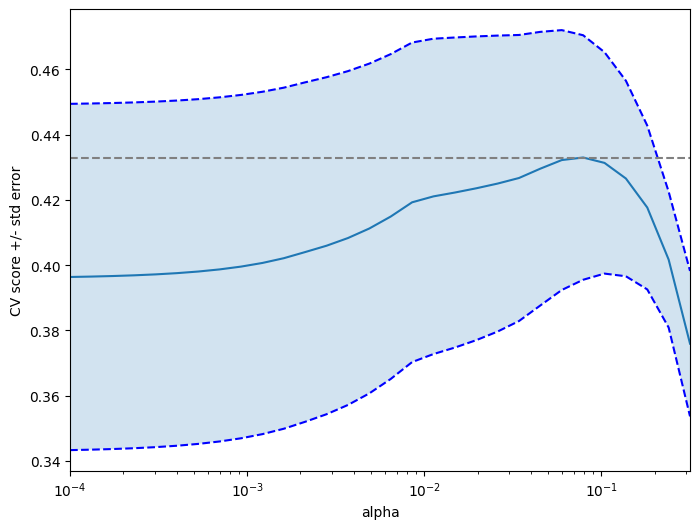

In [11]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

### My Changes to the Original Code

In [12]:
def results_of_changed_k(n_folds):
    clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
    clf.fit(X, y)
    scores = clf.cv_results_["mean_test_score"]
    scores_std = clf.cv_results_["std_test_score"]
    plt.figure().set_size_inches(8, 6)
    plt.semilogx(alphas, scores)

    std_error = scores_std / np.sqrt(n_folds)

    plt.semilogx(alphas, scores + std_error, "b--")
    plt.semilogx(alphas, scores - std_error, "b--")

    # alpha=0.2 controls the translucency of the fill color
    plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

    plt.ylabel("CV score +/- std error")
    plt.xlabel("alpha")
    plt.axhline(np.max(scores), linestyle="--", color=".5")
    plt.xlim([alphas[0], alphas[-1]])

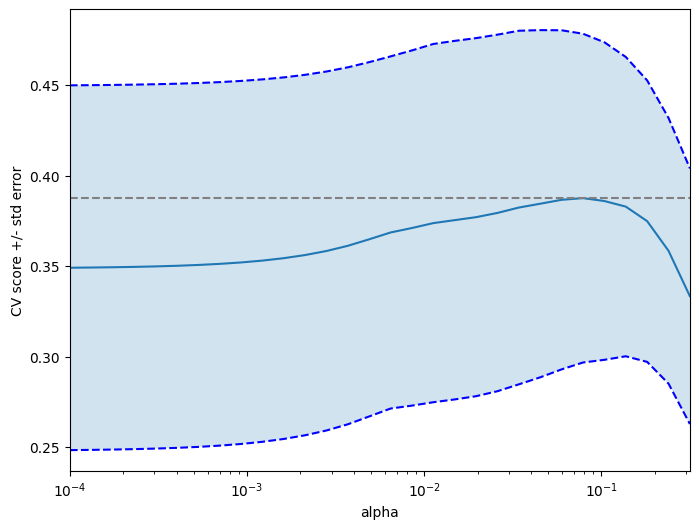

In [13]:
n_folds = 3
results_of_changed_k(n_folds)

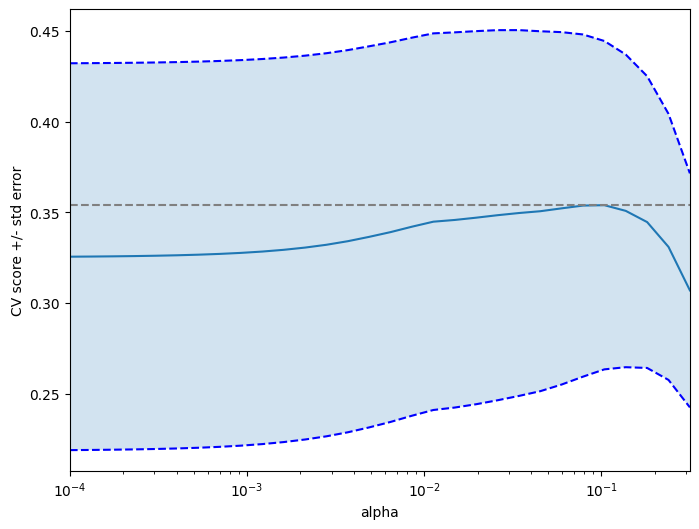

In [14]:
n_folds = 10
results_of_changed_k(n_folds)

### My Findings

I modifed the value of $k$ in the originial code two times, like so:
1. changed k from 5 to 3
2. changed k from 5 to 10

For change #1, I found that decreasing the value of $k$ did not affect the shape of the curve by much, however the confidence intervals got larger.

For change #2, I found that increasing the value of $k$ also did not affect the shape of the curve by much, however the confidence intervals got even larger.

## Question Three
Write a Python script that computes the MAE, MSE, RMSE, R-squared, and adjusted R-squared metrics for a given dataset. Analyze the resulting metric values to determine whether the model performed well or not.

In [15]:
import pandas as pd 
df = pd.DataFrame([
    [19,20],
    [30,26],
    [89,80],
    [38,40],
    [46,46],
    [77,74],
    [65,68],
    [54,54],
    [45,38]
])

In [16]:
def mae(data):
    n = len(data[0])
    mae = 0
    for index, value in enumerate(data[0]):
        mae += np.abs(data[0][index] - data[1][index])
    mae /= n
    return mae

In [17]:
def mse(data):
    n = len(data[0])
    mse = 0
    for index, value in enumerate(data[0]):
        mse += np.abs(data[0][index] - data[1][index]) ** 2
    mse /= n
    return mse

In [18]:
def rmse(data):
    rmse = np.sqrt(mse(data))
    return rmse

In [19]:
def rsquare(data):
    mean = np.average(data[0])
    numerator = 0
    denominator = 0
    for index, value in enumerate(data[0]):
        numerator += np.abs(data[0][index] - data[1][index]) ** 2
        denominator += np.abs(data[0][index] - mean) ** 2
    rsquare = numerator / denominator
    rsquare = 1 - rsquare
    return rsquare

In [20]:
def a_rsquare(data):
    r2 = rsquare(data)
    p = len(df.iloc[0])
    n = len(df[0])

    numerator = (1 - r2) * (n - 1)
    denominator = n - p - 1
    a_rsquare = 1 - (numerator / denominator)
    return a_rsquare

In [21]:
print(f"MAE = {mae(df)}")
print(f"MSE = {mse(df)}")
print(f"RMSE = {rmse(df)}")
print(f"R-Squared = {rsquare(df)}")
print(f"Adjusted R-Squared = {a_rsquare(df)}")

MAE = 3.2222222222222223
MSE = 18.77777777777778
RMSE = 4.333333333333333
R-Squared = 0.9579415993805995
Adjusted R-Squared = 0.943922132507466


We obtained a MAE of 3.2. This means that on average, there is a 3.2-value difference between the actual and predicted values. This is a reasonably low MAE, so we can say the model performed well, based on the MAE.

We obtained a MSE of 18.8, and RMSE of 4.3. These tell us that after heavily penalizing the errors, the model is reasonably close to the predicted values on the regression line, and hence the regression is more accurate. Since the MSE and RMSE are both low, we can say the model performed well.

We obtained an R-squared value of 0.96, which lies between the 0 and 1 range. Since it is closer to 1, it indicates that the model explains full variability in the target variable, with respect to the features. Based on this, we can say the model perfomed well and all features are taken into account.

We obtained an adjusted R-squared value of 0.94, which is close to 1 as well. This measure tells us that the model incorporates all the features with respect to the target variable, and these features have been adjusted to fit the model and incorporates the degrees of freedom. Based on this, we can say the model performed well.

Looking at all 5 metrics we computed, it is reasonable to say that the model performed as well as can be.

## Question Four
**What is the difference between Ridge regression and Lasso regression? How do these two regularization techniques help in preventing overfitting in a regression model? Additional - Can you provide an example where Ridge regression may be more appropriate to use than Lasso regression, and vice versa?**

Predictors which solve linear regression problems have coefficients in the models used. In some linear regression models, these coefficients may become relatively large, which in turn make the model 'unstable', such that it is sensitive to the training data, and at risk of overfitting. 

A solution to this problem is using a regularization function, ridge, or Tikhonov regularization. With **ridge regression**, the loss function of models with large coefficients includes additional costs. Specifically, the L2 penalty is used on the model, which reduces the coefficients of the input variables that did not contribute to the learning predictor. In doing so, the algorithm is forced to keep the model weights as small as possible and hence fit the data well. The regularization term that is added to the cost function (only during training) is given by: $\alpha \Sigma_{i=1}^n \theta_i^2$, where $\alpha$ is the hyperparameter that controls the extent of regularization in the model. When $\alpha=0$, the ridge regression is equivalent to linear regression, but if $\alpha$ is large, then all weights get penalized so heavily that the result is simply a flat line going through the data mean.

Another solution to the problem of large coefficients in linear regression models is **lasso regression** (Least Absolute Shrinkage and Selection Operator), which uses the L1 norm of the weight vector, instead of the L2 like ridge regression. Lasso regression tends to eliminate the weights entirely of the least important features, instead of simply penalizing them heavily like ridge regression. The regularization term that is added to the cost function (only during training) is given by: $\alpha \Sigma_{i=1}^n | \theta_i |$, where similarly to ridge regression, $\alpha$ is the hyperparameter that controls the extent of regularization in the model, and when $\alpha=0$, the lasso regression is equivalent to linear regression, and when $\alpha$ is large, all weights get penalized so heavily that the result is a flat line going through the data mean.

An example of when it is best to use ridge regression over lasso regression is when all the features are important but you want to reduce the multicollinearity of the features, and when you need to increase the stability of the model. On the other hand, an example of when it is best to use lasso regression over ridge regression is when you want to eliminate irrelevant features (feature selection), and when you need a sparse model, since it reduces features.

## Question Five
**How does Gradient Descent, Stochastic Gradient Descent, Mini-Batch Gradient Descent differ in terms of their approach to optimizing the objective function? How does the choice of learning rate affect the convergence of these algorithms to the global or local minima? Additionally - Explain the trade-offs between the three approaches with respect to the efficiency and accuracy of the optimization process? ----Another question can be--------------- Is it always the case that the loss function will be decreasing after a parameter update while applying/performing the Stochastic Gradient Descent (SGD) optimizer on a complete data set (no mini batches)? Justify your answer.**

Gradient descent, stochastic gradient descent, and mini-batch gradient descent are optimization algorithms for minimizing the cost function, and each approach the optimization differently.

The gradient descent algorithm starts with an initial value. A vector of partial derivatives is then calculated. At each iteration of the gradient descent algorithm, the algorithm takes a step forward in the direction of the negative of the gradient at the current point. The performance of gradient descent depends on the learning rate parameter chosen.

If the learning parameter is too small, then the algorithm will take many iterations to converge, which is costly in terms of time. However, this means that it would reach a high degree of precision, i.e. the algorithm will find the most precisely optimal parameter values for the model such that its cost function is minimized.

If the learning parameter is too large, then the step will take large steps for each iteration, which may take fewer steps to converge depending on the shape of the function. However if the shape of the function is too steep, then each large step may not reach the minimum value of the cost function and may diverge from the minimum and not reach a solution.

Gradient descent has a few pitfalls, for example it can get stuck in a local minimum instead of finding the global minimum, and the gradients can become noisy.

Stochastic gradient descent is an optimization algorithm that uses stochasticity, i.e. randomness, to find the optimal parameters. It randomly chooses an instance at each iteration and computes the gradient vector based on the chosen instance. It then randomly chooses another instance and repeats the process. Therefore, instead of the cost function decreasing smoothly towards the minimum, it instead randomly bounces up and down, until convergence is reached. However this convergence won't be necessarily optimal. 

Due to this, stochastic gradient descent is best used when the cost function is irregular, to give a chance to the algorithm to jump out of a local minima. In order to increase the chances of the algorithm finding the global optima, the learning rate can be decreased gradually. This makes it so the steps start large, and make quick progress and escape local minima, and then as the learning rate decreases, the algorithm can find the global minimum. The function to determine the learning rate at each iteration is called the learning schedule.

Stochastic gradient descent is great for computational effeciency, ease of implementation, and decrease of overfitting. However, it does require several hyperparameters like regularization, large number of iterations, and is sensitive to feature scaling.

Mini-batch descent is a balanced approach between gradient descent and stochastic gradient descent. It samples a small number of data points (mini-batch) at each iteration and computes the gradients based on these mini-batches. This approach works well in terms of computational and time effeciency, and stable convergence. However, given that the training set needs to be split into mini-batches of size n, this introduces a new hyperparameter, n, the mini-batch size. This hyperparameter affects the performance of the neural network.